In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [11]:
bias=100
X,y,coef=make_regression(n_features=1,bias=bias,coef=True,random_state=42,noise=10)

In [12]:
coef,bias

(array(41.74110031), 100)

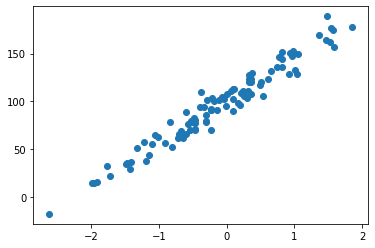

In [13]:
plt.scatter(X,y)

In [16]:
linear=LinearRegression().fit(X,y)

In [57]:
linear.coef_,linear.intercept_

(array([44.43716999]), 101.16511532052698)

In [23]:
linear.rank_

1

In [161]:
class CustomLinearRegression:
    def __init__(self,lr=0.01):
        self.__lr=lr
        self.errors=[]
    def fit(self,X,y):
        self.__X=X
        self.__y=y
        self.coef_=np.random.random()
        self.intercept_=np.random.random()
        for k in range(0,20):
            #print("Error",self.error())
            self.gradient_decent()
            
            self.errors.append(self.error())
        return self.errors
        
    def gradient_decent(self):
        delta_coef,delta_bias=self.gradient()
        self.coef_+=delta_coef
        self.intercept_+=delta_bias
        #print("Coefficient :",self.coef_,"\nIntercept : ",self.intercept_,"\n")
            
    def gradient(self):
        yh=self.hypo(self.__X)
        diff=(yh-self.__y.reshape((-1,1)))
        del_err_coef=(2*diff*self.__X).mean()
        del_err_inter=(2*diff).mean()
        return (-del_err_coef*self.__lr,-del_err_inter*self.__lr)
    
    def hypo(self,X):
        return (X*self.coef_+self.intercept_)
    def error(self):
        yh=self.hypo(self.__X)
        err=((yh-self.__y.reshape((-1,1)))**2).mean()
        return err
    

In [162]:
model=CustomLinearRegression(0.1)

In [163]:
model.fit(X,y)

[7311.3952524631695,
 4931.144850117661,
 3348.2175018837033,
 2290.9220274995178,
 1581.6307101995071,
 1103.7436523302388,
 780.4016816382541,
 560.7247390471048,
 410.8842954413768,
 308.290392398692,
 237.79203061462627,
 189.1835522119088,
 155.56129922014054,
 132.23599121791335,
 116.00977103088475,
 104.69354609785985,
 96.78334753791853,
 91.24237749300859,
 87.35360768594502,
 84.61967966246655]

In [164]:
model.coef_,model.intercept_

(42.17659381176282, 99.38348365751881)

In [165]:
model.error()

84.61967966246655

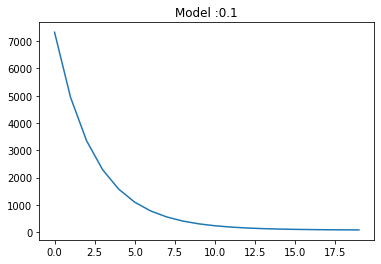

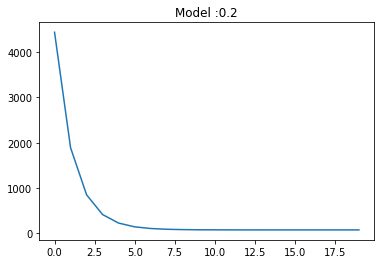

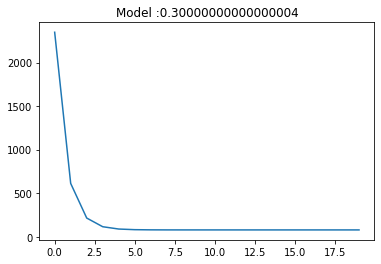

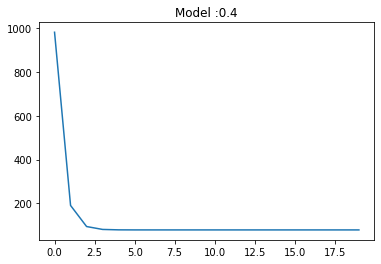

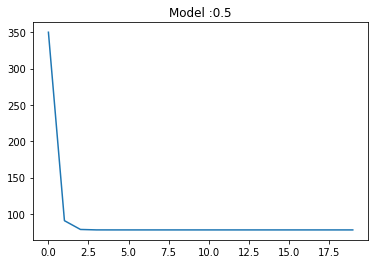

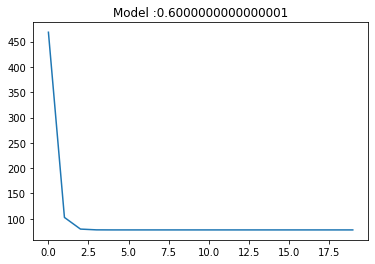

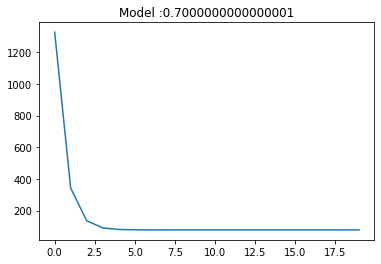

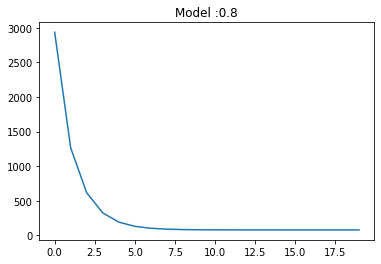

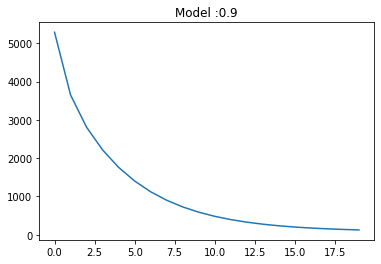

In [170]:
for i in range(1,10):
    model=CustomLinearRegression(0.1*i)
    err_list=model.fit(X,y)
    plt.figure()
    plt.title("Model :"+str(0.1*i))
    plt.plot(err_list)
plt.show()